## Observations and Insights 

* The population between male and female mice in the test are very close in numbers.
* There outliers in the Capomulin, Ramicane, Infubinol, and Ceftamin regimens are not significant to skew the data.
* The average tumor volume of each individual mice has a close correlation with its weight.
* Looking at the random samples on the line plot for capomulin, there are some mice where the tumor volume has actually increased. this implies other factors that may affect the drug efficacy.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import math
import random

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Set Font Size
font = {'family' : 'DejaVu Sans',
        'weight' : 'regular',
        'size'   : 16}

plt.rc('font', **font)

#plt.rcParams.update({'font.size': 22})

# Combine the data into a single dataset
combinedData = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")
# Display the data table for preview
combinedData.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(mouse_metadata)

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Optional: Get all the data for the duplicate mouse ID. 
dupMouse = combinedData[combinedData.duplicated(subset=["Mouse ID","Timepoint"], keep=False)]["Mouse ID"].unique()
len(combinedData)

1893

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# The code will programatically drop any mouse ID with duplicate data ;)
combinedData = combinedData[~combinedData.rename(columns={"Mouse ID":"MouseID"}).MouseID.isin(dupMouse)]

In [5]:
# Checking the number of mice in the clean DataFrame.
len(combinedData)

1880

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
sumStatDF = (pd.DataFrame(combinedData.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
             .rename(columns={"Tumor Volume (mm3)": "Tumor Vol. Mean"}))

# This method is the most straighforward, creating multiple series and putting them all together at the end.
sumStatDF["Tumor Vol. Median"] = (pd.DataFrame(combinedData.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
             .rename(columns={"Tumor Volume (mm3)": "Tumor Vol. Median"}))

sumStatDF["Tumor Vol. Variance"] = (pd.DataFrame(combinedData.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
             .rename(columns={"Tumor Volume (mm3)": "Tumor Vol. Variance"}))

sumStatDF["Tumor Vol. Std Dev"] = (pd.DataFrame(combinedData.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
             .rename(columns={"Tumor Volume (mm3)": "Tumor Vol. Std Dev"}))

sumStatDF["Tumor Vol. SEM"] = (pd.DataFrame(combinedData.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())
             .rename(columns={"Tumor Volume (mm3)": "Tumor Vol. SEM"}))

sumStatDF.head()

,Tumor Vol. Mean,Tumor Vol. Median,Tumor Vol. Variance,Tumor Vol. Std Dev,Tumor Vol. SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
SumStatDF2 = pd.DataFrame(combinedData[["Drug Regimen","Tumor Volume (mm3)"]])

# run an aggregation grouping by drug regimen
SumStatDF2 = SumStatDF2.groupby("Drug Regimen").agg(['mean','median','var','std','sem'])

# This method produces everything in a single groupby function
SumStatDF2.columns = (["Tumor Vol Mean","Tumor Vol Median","Tumor Vol Variance","Tumor Vol Std Dev","Tumor Vol SEM"])
SumStatDF2.head()

,Tumor Vol Mean,Tumor Vol Median,Tumor Vol Variance,Tumor Vol Std Dev,Tumor Vol SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

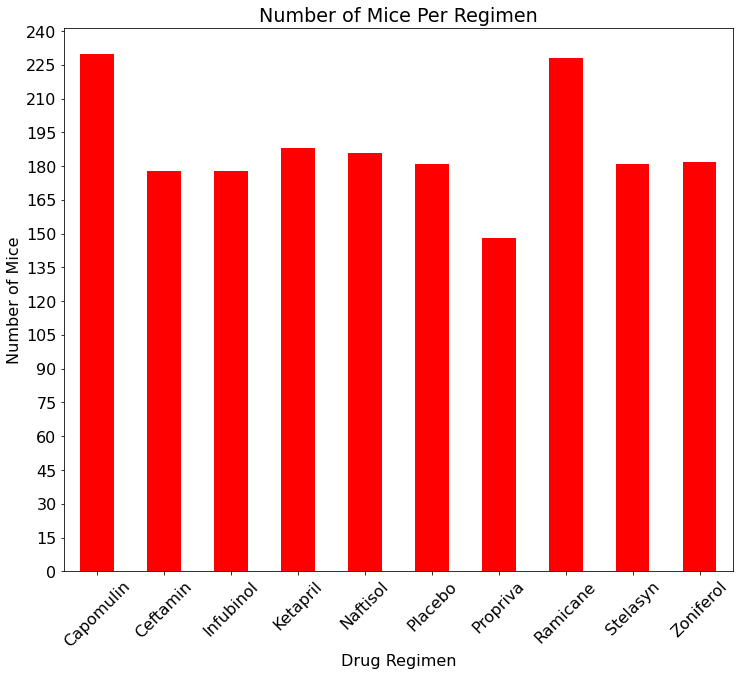

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouseCtDF=pd.DataFrame(combinedData[["Mouse ID","Drug Regimen"]]
                       #.drop_duplicates()
                       .groupby("Drug Regimen")
                       .count())

yticklbl=np.arange(0,mouseCtDF["Mouse ID"].max() + 15,15)

mouseCtDFplot = mouseCtDF.plot(kind="bar", 
                               facecolor="red", 
                               figsize=(12, 10), 
                               title="Number of Mice Per Regimen",
                               legend = False,
                               yticks=yticklbl)
# Create Labels
mouseCtDFplot.set_xlabel("Drug Regimen")
mouseCtDFplot.set_ylabel("Number of Mice")
plt.xticks(rotation=45)
plt.show(mouseCtDFplot)

# I would do a distinct each mouse ID but as per checking with TA 
#the "throughout" keyword implies all tests done for each mice

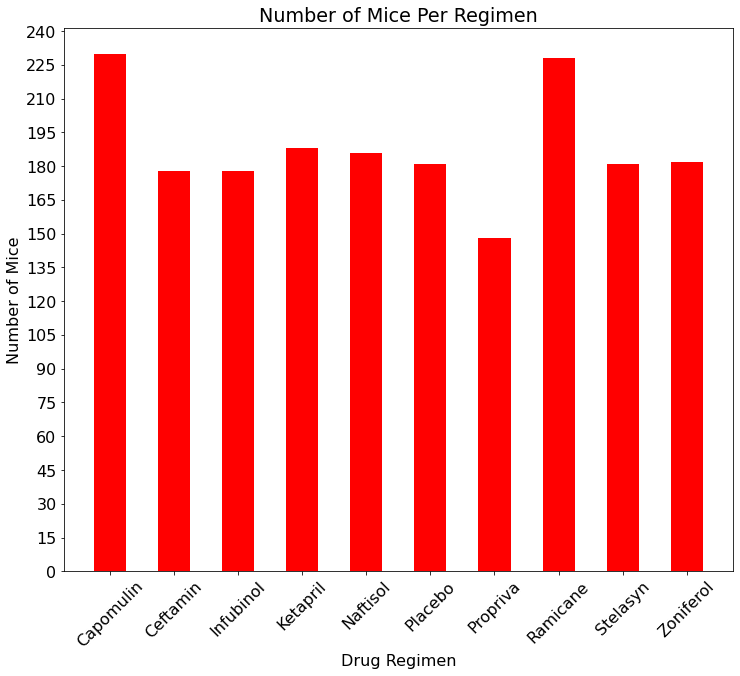

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mouseCtDF_bar=mouseCtDF.copy().reset_index(drop=False)
plt.figure(figsize=(12, 10))
plt.bar(mouseCtDF_bar["Drug Regimen"],
        mouseCtDF_bar["Mouse ID"],
        color='red',
        alpha=1,
        align='center',
        width=.5)

# Create Labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice Per Regimen")

# Set Y ticks and Xticks rotation
plt.yticks(yticklbl)
plt.xticks(rotation=45)
plt.show()

# I would do a distinct each mouse ID but as per checking with TA 
#the "throughout" keyword implies all tests done for each mice

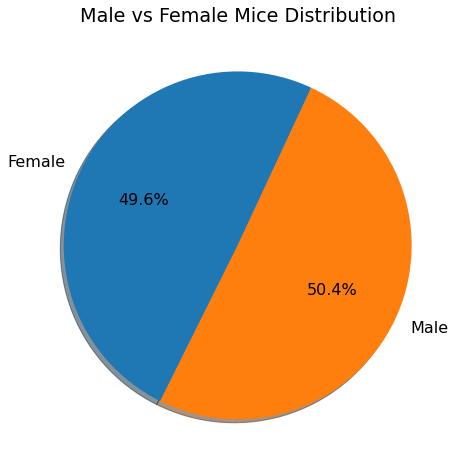

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender_DF=pd.DataFrame(combinedData[["Mouse ID","Sex"]]
                       .drop_duplicates()
                       .groupby("Sex")
                       .count())
mouse_gender_DFplot = mouse_gender_DF.plot(kind="pie",
                                           y="Mouse ID",
                                           figsize=(8, 8), 
                                           title="Male vs Female Mice Distribution",
                                           legend = False, 
                                           autopct="%1.1f%%",
                                           shadow=True, 
                                           startangle=65)
plt.ylabel("")
plt.show(mouse_gender_DFplot)

# my understanding is to get a distinct mouse ID for each mouse gender

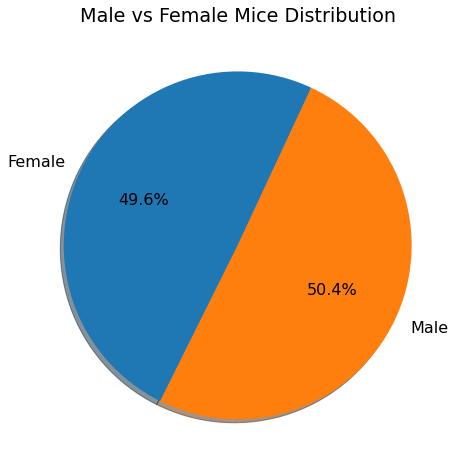

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouseGenderDF_pie=mouse_gender_DF.copy().reset_index(drop=False)
plt.figure(figsize=(8, 8))
plt.pie(mouseGenderDF_pie["Mouse ID"],
        labels=mouseGenderDF_pie["Sex"], autopct="%1.1f%%",shadow=True, startangle=65)

# Create Labels
plt.title("Male vs Female Mice Distribution")
plt.show()


# my understanding is to get a distinct mouse ID for each mouse gender

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimen_filter = ["Capomulin" , "Ramicane", "Infubinol" , "Ceftamin"]
regimen_filter_DF = pd.DataFrame(combinedData[combinedData.rename(columns={"Drug Regimen":"DR"})
                                 .DR.isin(regimen_filter)]).copy()

# Start by getting the last (greatest) timepoint for each mouse
regFltrGrpd = regimen_filter_DF.groupby(["Mouse ID","Drug Regimen"],as_index=False)["Timepoint"].max()#.transform('Tumor Volume (mm3)')

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
regimen_filter_DF = pd.merge(regFltrGrpd, regimen_filter_DF, how="left", on=["Mouse ID","Drug Regimen","Timepoint"])
regimen_filter_DF

,Mouse ID,Drug Regimen,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,45,Female,20,23,67.973419,2
1,a251,Infubinol,45,Female,21,25,65.525743,1
2,a275,Ceftamin,45,Female,20,28,62.999356,3
3,a411,Ramicane,45,Male,3,22,38.407618,1
4,a444,Ramicane,45,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,Ceftamin,45,Female,6,27,68.594745,4
96,y793,Capomulin,45,Male,17,17,31.896238,2
97,y865,Ceftamin,45,Male,23,26,64.729837,3
98,z578,Ramicane,45,Male,11,16,30.638696,0


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
tumor_Vol_Data_LST=[]
for regimen in regimen_filter:

    # Create empty list to fill with tumor vol data (for plotting)
    drugRegimenDF=regimen_filter_DF.loc[regimen_filter_DF["Drug Regimen"] == regimen]
    tumor_Vol_Data_LST=drugRegimenDF["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_Vol_Data_LST.quantile([.25,.5,.75])
    lowerq = round(quartiles[0.25],4)
    upperq = round(quartiles[0.75],4)
    iqr = round(upperq-lowerq,4)

    print("************************************************************")
    print(f"DRUG REGIMEN: {regimen}")
    print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
    print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
    print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
    print(f"The median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

    # Locate the rows which contain mice on each drug and get the tumor volumes   
    # add subset
    
    # Determine outliers using upper and lower bounds
    lower_bound = round(lowerq - (1.5*iqr),4)
    upper_bound = round(upperq + (1.5*iqr),4)

    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    # filter for lower bound and upper bound values
    tumor_Vol_Data_LST = tumor_Vol_Data_LST.loc[(tumor_Vol_Data_LST <= lower_bound) | (tumor_Vol_Data_LST >= upper_bound)] 

    # initialise outlier text
    outliers=""
    
    # add outliers to text
    for i in tumor_Vol_Data_LST:
        outliers = str(round(i,4)) + " "
    
    # print outliers if outlier text is not empty
    if (outliers != ""):
        print(f"The following values are possible outliers in the Data: {outliers}")
    else:
        print("There are no possible outliers in the Data")
print("************************************************************")


************************************************************
DRUG REGIMEN: Capomulin
The lower quartile of Tumor Volume (mm3) is: 32.3774
The upper quartile of Tumor Volume (mm3) is: 40.1592
The interquartile range of Tumor Volume (mm3) is: 7.7818
The median of Tumor Volume (mm3) is: 38.125164399999996 
Values below 20.7047 could be outliers.
Values above 51.8319 could be outliers.
There are no possible outliers in the Data
************************************************************
DRUG REGIMEN: Ramicane
The lower quartile of Tumor Volume (mm3) is: 31.5605
The upper quartile of Tumor Volume (mm3) is: 40.659
The interquartile range of Tumor Volume (mm3) is: 9.0985
The median of Tumor Volume (mm3) is: 36.56165229 
Values below 17.9128 could be outliers.
Values above 54.3067 could be outliers.
There are no possible outliers in the Data
************************************************************
DRUG REGIMEN: Infubinol
The lower quartile of Tumor Volume (mm3) is: 54.0486
The upper quart

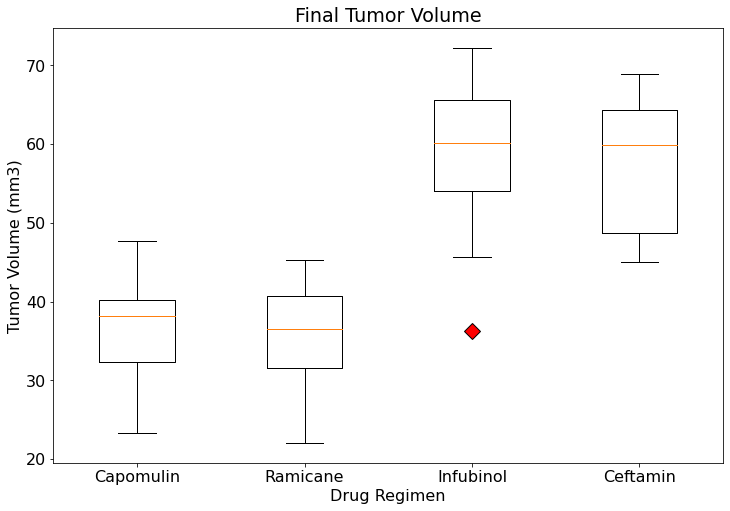

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Capomulin, Ramicane, Infubinol, and Ceftamin
data=[]
#x_axis_element=np.arange(1,len(regimen_filter) + 1,1)
outlierMarker=dict(markerfacecolor='r', marker='D',markersize=12)

# Another way to do this - box plots in different canvases
# for i in regimen_filter:
#    data = regimen_filter_DF.loc[regimen_filter_DF["Drug Regimen"] == i]["Tumor Volume (mm3)"]
#
#    plt.figure(figsize=(8, 8))
#    plt.boxplot(data,flierprops=outlierMarker)
#    plt.title('Final Tumor Volume For ' + i)
#    plt.ylabel('Tumor Volume (mm3)')
#    plt.show()    

# Add each regimen data to the plot
for i in regimen_filter:
    data.append(regimen_filter_DF.loc[regimen_filter_DF["Drug Regimen"] == i]["Tumor Volume (mm3)"])

# Print the box plot
x_axis_element=np.arange(1,len(regimen_filter) + 1,1)
plt.figure(figsize=(12, 8))
plt.boxplot(data,flierprops=outlierMarker)

# Update labels
plt.title('Final Tumor Volume')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

# reuse regimen_filter for x-tick labels
plt.xticks(x_axis_element,regimen_filter)
plt.show()

## Line and Scatter Plots

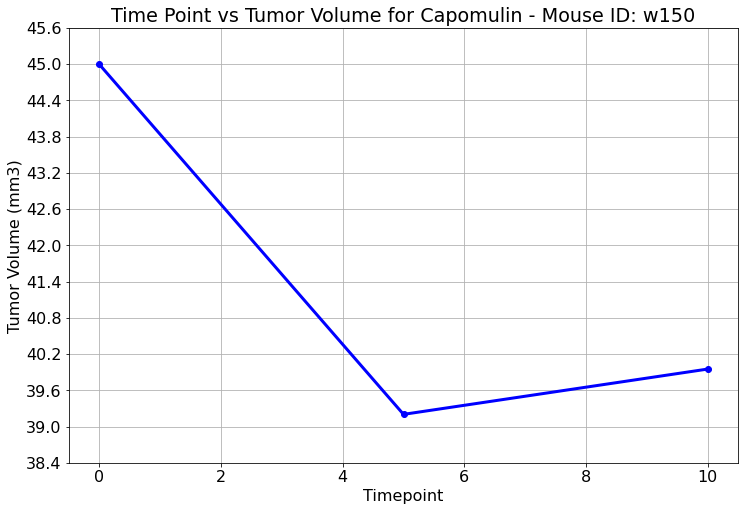

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Get a mouse ID from Capomulin treatment randomly for excitement :)
mouseIdCapo=combinedData.loc[combinedData["Drug Regimen"] == "Capomulin"]["Mouse ID"].unique()
sampleIndex=random.randint(0,len(mouseIdCapo)-1)
mouseID = mouseIdCapo[sampleIndex]
sampleData = combinedData.loc[combinedData["Mouse ID"] == mouseID]

# format Y tick labels
minVol = math.floor(sampleData["Tumor Volume (mm3)"].min())
maxVol = math.ceil(sampleData["Tumor Volume (mm3)"].max())
variance = (maxVol-minVol)/10
yticklbl=np.arange(minVol-variance,maxVol+variance,variance)

# Generate line plot - RANDOM CAPOMULIN SAMPLE MOUSE EVERYTIME!!!!
plt.figure(figsize=(12, 8))
plt.plot(sampleData["Timepoint"],sampleData["Tumor Volume (mm3)"],marker="o",color="blue", linewidth=3)

# update labels and title
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Time Point vs Tumor Volume for Capomulin - Mouse ID: " + mouseID)

#update ticks
plt.ylim(minVol-variance,maxVol+variance)
plt.yticks(yticklbl) 
plt.grid()

# show the plot
plt.show()

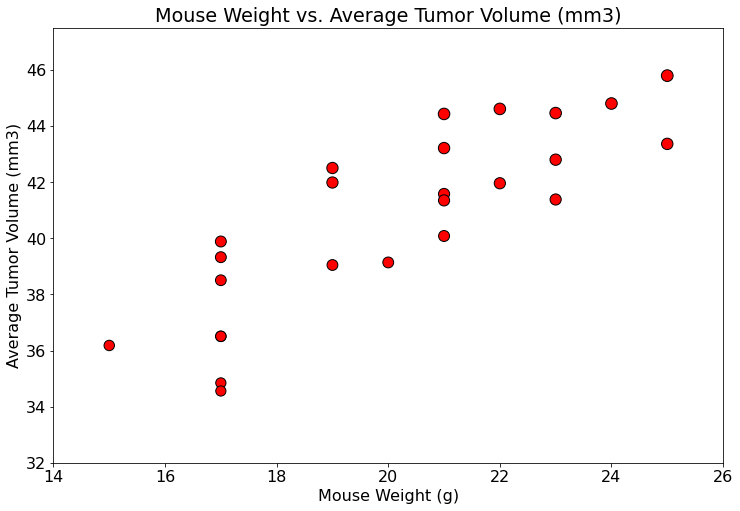

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Isolate data for Capomulin Regimen
capomulin_Batch_Full=combinedData.loc[combinedData["Drug Regimen"] == "Capomulin"]
# Get average tumor volume for each mouse weight as described in the requirements
capomulin_Batch_Full=capomulin_Batch_Full.groupby("Mouse ID").mean()
mouse_weight_LS = capomulin_Batch_Full.iloc[:,1]
avg_tumor_vol_LS = capomulin_Batch_Full.iloc[:,3]

# Create Scatter Plot
plt.figure(figsize=(12, 8))
capomulin_scatterplot = plt.scatter(mouse_weight_LS,
            avg_tumor_vol_LS,
            marker="o", 
            facecolors="red", 
            edgecolors="black",
            s=capomulin_Batch_Full['Tumor Volume (mm3)']*3)

# Add labels and title
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume (mm3)")
plt.xlim(14,26)
plt.ylim(32,47.5)

# Show plot
plt.show(capomulin_scatterplot)

## Correlation and Regression

The correlation coefficient between Mouse Weight and Average Tumor Volume (mm3) is 0.84


[]

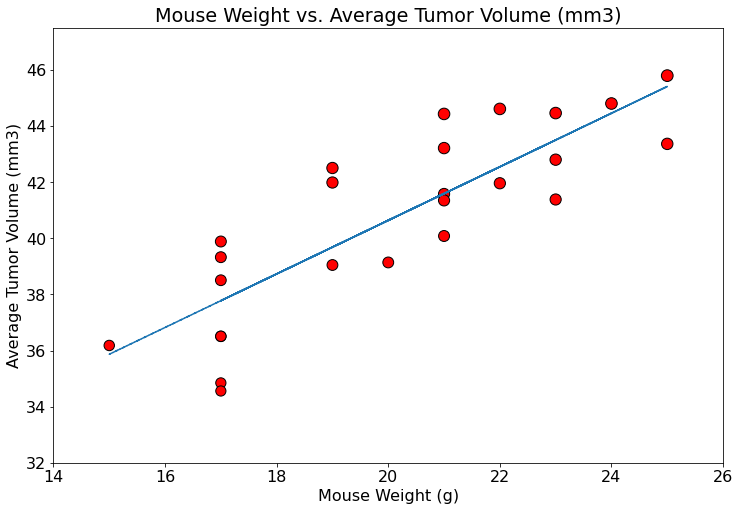

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print("The correlation coefficient between Mouse Weight and Average Tumor Volume (mm3) is " \
      + str(round(st.pearsonr(mouse_weight_LS,avg_tumor_vol_LS)[0],2)))

# Perform a linear regression on year versus violent crime rate
(vc_slope, vc_int, vc_r, vc_p, vc_std_err) = st.linregress(mouse_weight_LS, avg_tumor_vol_LS)
# Create equation of line to calculate predicted violent crime rate
vc_fit = vc_slope * mouse_weight_LS + vc_int
# Plot the linear model over the scatter plot

# Redo Scatter Plot
plt.figure(figsize=(12, 8))
capomulin_scatterplot = plt.scatter(mouse_weight_LS,
            avg_tumor_vol_LS,
            marker="o", 
            facecolors="red", 
            edgecolors="black",
            s=capomulin_Batch_Full['Tumor Volume (mm3)']*3)

# plot the linear model
plt.plot(mouse_weight_LS,vc_fit,"--")

# Add labels and title
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume (mm3)")
plt.xlim(14,26)
plt.ylim(32,47.5)

# Show the Plot
plt.plot()